Mean Squared Error: 0.2226


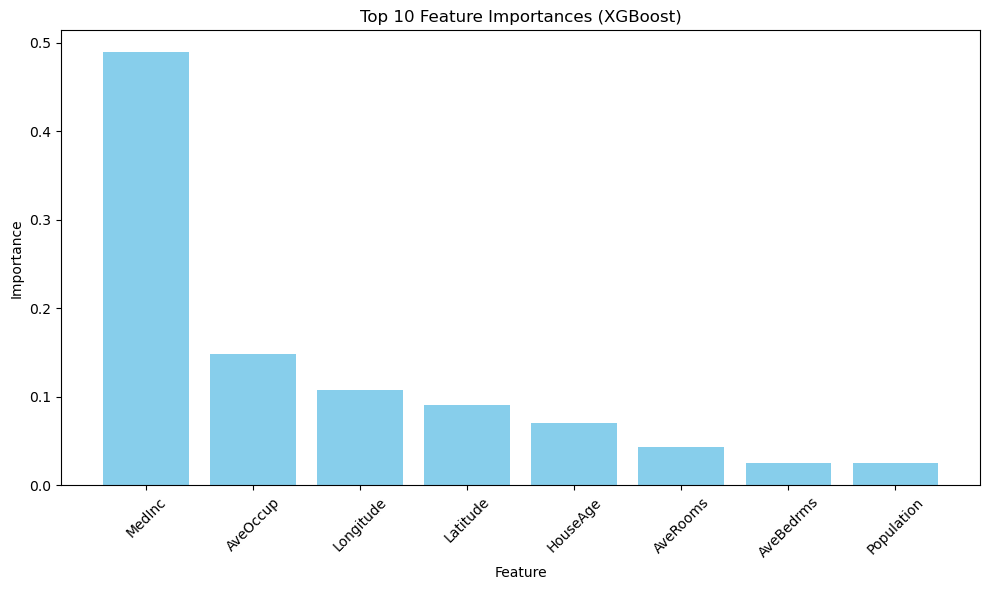


Discussion:
The most important feature is MedInc with an importance of 0.490.
It’s interesting how some location-based features like 'AveOccup' might be less important than expected.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
importances = model.feature_importances_
feature_names = data.feature_names
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Top 10 Feature Importances (XGBoost)')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nDiscussion:")
top_feature = importance_df.iloc[0]
print(f"The most important feature is {top_feature['Feature']} with an importance of {top_feature['Importance']:.3f}.")
print("It’s interesting how some location-based features like 'AveOccup' might be less important than expected.")
